<center><h1>Noise Characterisation</h1> </center> 
Here we are charactersing the noise <br>
Instrumental noises are assumed to be Gaussian distribute. <br>
np.random.randn can generate Gaussian noise with zero mean, $\mu=0$ and variance $\sigma^2=1$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
# These are imports

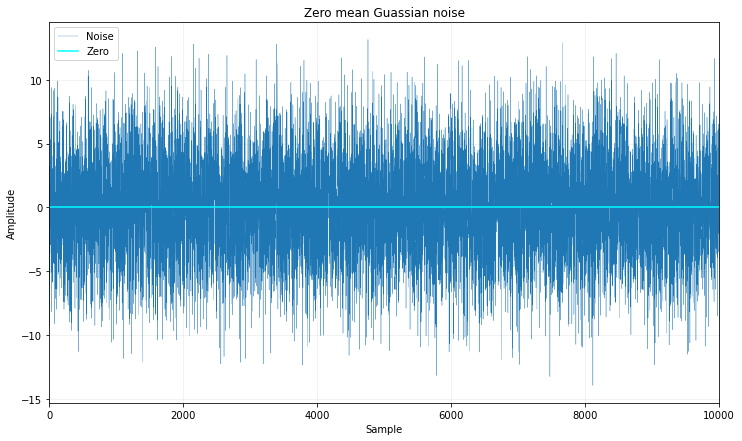

In [3]:
Nsamples=10000  # Number of noise samples
r=np.random.randn(Nsamples)*4.0
sig=np.sqrt(np.var(r))
# Let us plot and see
# Random number is number with no apperent relation between nth and n+1th number
plt.figure(figsize=(12, 7))
plt.plot(r, lw=0.3, label='Noise')
plt.grid(alpha=0.2)
plt.axhline(y=0, color='cyan', label='Zero')
plt.title('Zero mean Guassian noise')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.xlim([0,Nsamples])
plt.legend()
plt.show()

Histogram gives the prob. density function(PDF) p(x) <br>
np.histrogram can given the PDF
The normalises Guassian with $\mu$  as mean and $\sigma^2$ as variance is given by <br>
<center>$ f(x) \, = \, \frac{1}{\sigma\, \sqrt{2\pi} } e^{- \left(\frac{x-\mu}{\sqrt{2} \, \sigma}  \right)^2}$ </center><br>
We normalise hostogram.<br>

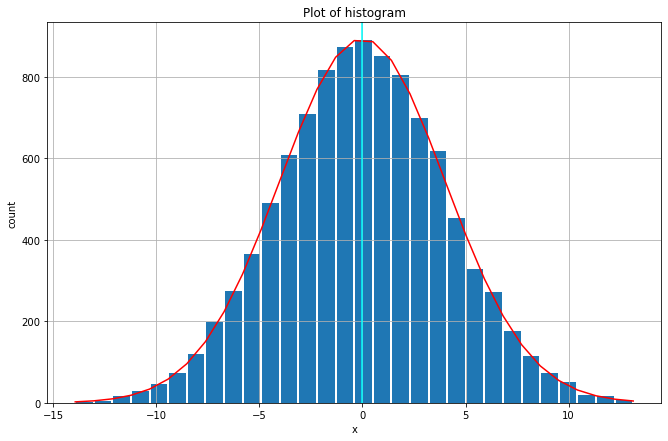

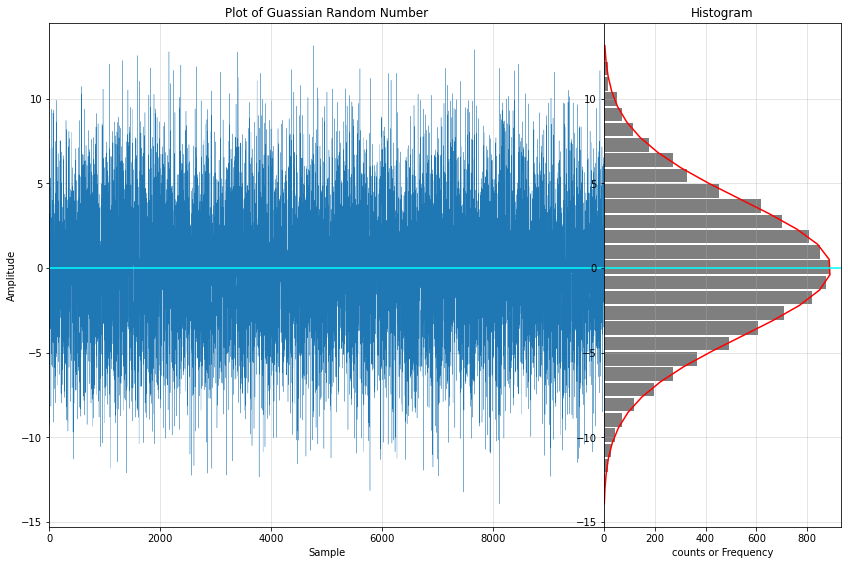

In [4]:
def guass(x, sigma=1,mu=0) :
    fx=1/sigma/np.sqrt(2*np.pi)*np.exp(-((x-mu)/(np.sqrt(2)*sigma))**2)
    return fx
pdf,bins=np.histogram(r, bins=30)
# we need normalisation!
dx=(bins[1]-bins[0])
norm=np.sum(pdf)*dx
plt.figure(figsize=(11, 7))
plt.bar(bins[0:-1]+dx/2, pdf, label='PDF')
# Reminder bins gives the edge not the mid-point, we can shift to mid
# point 
plt.plot(bins, guass(bins, sig, mu=0)*norm, 'r')
# Guassian function
plt.xlabel('x')
plt.axvline(x=0,color='cyan')
plt.ylabel('count')
plt.grid(0.2)
plt.title('Plot of histogram')

# Some more plots' it is fun
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 7), tight_layout=True, sharey=True)
fig1=plt.figure(figsize=(11,7))
#ax1=mp.axes.Axes(fig=fig1, rect=[0, 0, .7, 1])
ax1=plt.axes([0,0,.7,1])
ax2=plt.axes([.7,0,0.3,1], sharey=ax1)
ax2.barh(bins[0:-1]+dx/2, pdf, color='C7', label='PDF')
ax2.plot( guass(bins, sig, 0)*norm,bins, 'r')
ax1.plot(r,lw=0.3, label='Noise')
ax1.set_title('Plot of Guassian Random Number')
ax2.set_title('Histogram')
ax1.grid(alpha=0.4)
ax2.grid(alpha=0.4)
ax1.set_xlim([0,Nsamples])
ax1.axhline(y=0,color='cyan')
ax2.axhline(y=0,color='cyan')
ax1.set_xticks(ax1.get_xticks()[0:-1])
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude')
ax2.set_xlabel('counts or Frequency')
plt.show()

Let $\lambda$ be any real number. The probability of finding a number $x$ shuch that $x<=\lambda$ is $\int_{-\infty}^{\lambda}$ $p(x) dx $ where $p(x)$ is PDF of the noise! is also called cummulative prob. density function or CDF. <br>
The prob. of find noise sample $ x > $\lambda$ is 1-CDF<br>

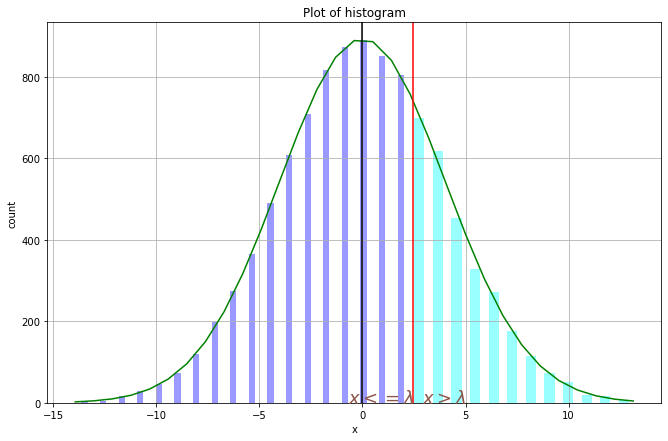

In [5]:
# Let lambda be 2
L=2.0
plt.figure(figsize=(11, 7))
(idx,)=np.where(bins<L)
(idy,)=np.where(bins>L)
plt.bar(bins[idx]+dx/2, pdf[idx],width=0.3,color='b', label='PDF', alpha=0.4)
plt.bar(bins[idy[0:-1]]+dx/2, pdf[idy[0:-1]],width=0.5,color='cyan', label='PDF', alpha=0.4)
# Reminder bins gives the edge not the mid-point, we can shift to mid
# point 
plt.plot(bins, guass(bins,sig, 0)*norm, 'g')
# Guassian function
plt.xlabel('x')
plt.axvline(x=0,color='k')
plt.axvline(x=L+dx/2,color='red')
plt.ylabel('count')
plt.grid(0.2)
plt.title('Plot of histogram')
plt.text(L-3*dx,0, '$x<=\lambda$', size=18, color='C5')
plt.text(L+1*dx,0, '$x>\lambda$', size=18, color='C5')
plt.show()

<center><h1> Sinusodal signal and Guassian noise </h1> </center> 

Let us consider a time series of the following form<br>
$h(t) = sin( \omega t) + \sigma^2 n(t) $ where  $\omega = 2\pi f$ and $n(t)$ is zero mean guassian noise with unit variance <br>
* Let f=10.0 Hz <br>
* let us take 30 Hz to be signal samling rate ie. sps=30 <br> 
* Then dt=1/30 <br>
* Le the signal be observered for $10 = T_0$ secs <br>
* $df = 1/T_0$


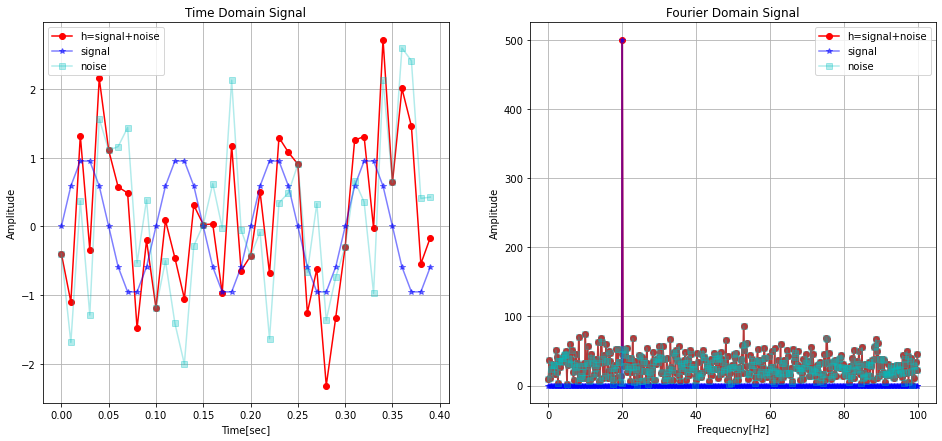

In [6]:
f0=10.0
sps=100.0
fmax=sps/2

dt=1/sps
T0=10.0
sigma2=1
Nsamples=int(T0*sps)
Nfft=int(Nsamples/2)+1
ff=np.linspace(0,sps, Nfft)
ff=ff[0:-1]
t=np.linspace(0,T0,Nsamples, endpoint=False)
y=np.sin(2*np.pi*f0*t)
fy=np.fft.fft(y)
n=sigma2*np.random.randn(Nsamples)
fn=np.fft.fft(n)
h=y+n
fh=np.fft.fft(h)
plt.figure(figsize=[16,7])
ax1=plt.subplot(1,2,1)
NS=40
plt.plot(t[0:NS],h[0:NS],'ro-', label='h=signal+noise')
plt.plot(t[0:NS],y[0:NS],'b*-',alpha=0.5, label='signal')
plt.plot(t[0:NS],n[0:NS],'cs-',alpha=0.3, label='noise')
plt.title('Time Domain Signal')
plt.xlabel('Time[sec]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
ax3=plt.subplot(1,2,2)
plt.plot(ff,np.abs(fh[:Nfft-1]),'ro-', label='h=signal+noise')
plt.plot(ff,np.abs(fy[:Nfft-1]),'b*-',alpha=0.5, label='signal')
plt.plot(ff,np.abs(fn[:Nfft-1]),'cs-',alpha=0.3, label='noise')
plt.title('Fourier Domain Signal')
plt.xlabel('Frequecny[Hz]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
## Signal stands out in Fourier domain

<center><h1> Sinusodal signal and Guassian noise </h1> </center> 

For details about PSD of noise 	arXiv:gr-qc/9710080 </br>
We look at Stationary Guassian Noise, which is represented mean and deviation </br>

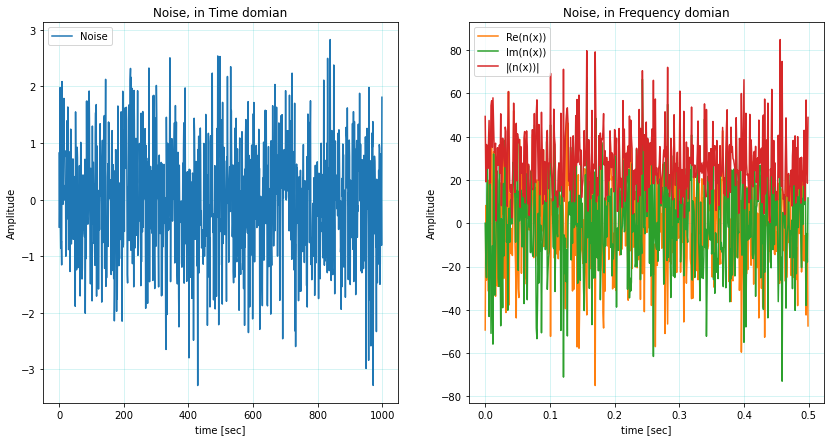

(array([ 2,  0,  0,  8,  2,  7, 10, 12, 24, 26, 38, 36, 62, 87, 88, 80, 62,
        66, 62, 72, 76, 60, 40, 28, 20,  8,  8,  8,  4,  4]),
 array([-74.94877335, -70.42417332, -65.8995733 , -61.37497327,
        -56.85037325, -52.32577322, -47.8011732 , -43.27657317,
        -38.75197315, -34.22737312, -29.7027731 , -25.17817307,
        -20.65357304, -16.12897302, -11.60437299,  -7.07977297,
         -2.55517294,   1.96942708,   6.49402711,  11.01862713,
         15.54322716,  20.06782718,  24.59242721,  29.11702723,
         33.64162726,  38.16622729,  42.69082731,  47.21542734,
         51.74002736,  56.26462739,  60.78922741]))

<Figure size 1008x504 with 0 Axes>

In [26]:
# Here we assume dt 1 sec Np becomes Tmax
Np=1000
Nfft=int(Np/2)
sps=1.0
ff=np.linspace(0, sps/2,Nfft+1 )
ff=ff[0:-1];
r=np.random.randn(Np)
fr=np.fft.fft(r)
fig1=plt.figure(figsize=[14,7])
plt.subplot(1,2,1)
plt.plot(r, label='Noise')
plt.title('Noise, in Time domian')
plt.xlabel('time [sec]')
plt.ylabel('Amplitude')
plt.grid(alpha=0.2, color='c')
plt.legend()
plt.subplot(1,2,2)
plt.plot(ff, np.real(fr[:Nfft]), 'C1', label='Re(n(x))')
plt.plot(ff, np.imag(fr[:Nfft]), 'C2', label='Im(n(x))')
plt.plot(ff, np.abs(fr[:Nfft]), 'C3', label='|(n(x))|')
plt.title('Noise, in Frequency domian')
plt.xlabel('time [sec]')
plt.ylabel('Amplitude')
plt.grid(alpha=0.2, color='c')
plt.legend()
plt.show()
# Noise is random in both time domain and frequency domain 
fig1=plt.figure(figsize=[14,7])
np.histogram(np.real(fr), bins=30)
